In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    #print(city_url)

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
#Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
#         # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
#         Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | kahului
Processing Record 5 of Set 1 | khonuu
City not found. Skipping...
Processing Record 6 of Set 1 | jaguey grande
Processing Record 7 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | kasamwa
Processing Record 11 of Set 1 | sarahan
Processing Record 12 of Set 1 | saskylakh
Processing Record 13 of Set 1 | tuatapere
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | avera
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | anau
Processing Record 20 of Set 1 | nanakuli
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 

Processing Record 39 of Set 4 | arlit
Processing Record 40 of Set 4 | talnakh
Processing Record 41 of Set 4 | staryy nadym
Processing Record 42 of Set 4 | sao filipe
Processing Record 43 of Set 4 | amderma
City not found. Skipping...
Processing Record 44 of Set 4 | fort nelson
Processing Record 45 of Set 4 | souillac
Processing Record 46 of Set 4 | namibe
Processing Record 47 of Set 4 | rabo de peixe
Processing Record 48 of Set 4 | quatre cocos
Processing Record 49 of Set 4 | hasaki
Processing Record 50 of Set 4 | hambantota
Processing Record 1 of Set 5 | sioux lookout
Processing Record 2 of Set 5 | gorzow wielkopolski
Processing Record 3 of Set 5 | vestmanna
Processing Record 4 of Set 5 | luderitz
Processing Record 5 of Set 5 | saint-augustin
Processing Record 6 of Set 5 | codrington
Processing Record 7 of Set 5 | klaksvik
Processing Record 8 of Set 5 | kjollefjord
Processing Record 9 of Set 5 | abha
Processing Record 10 of Set 5 | adrar
Processing Record 11 of Set 5 | pochinki
Proces

Processing Record 30 of Set 8 | kohtla-jarve
Processing Record 31 of Set 8 | pemangkat
Processing Record 32 of Set 8 | matehuala
Processing Record 33 of Set 8 | ancud
Processing Record 34 of Set 8 | puerto quijarro
Processing Record 35 of Set 8 | kaitangata
Processing Record 36 of Set 8 | opuwo
Processing Record 37 of Set 8 | tongsa
City not found. Skipping...
Processing Record 38 of Set 8 | tual
Processing Record 39 of Set 8 | boyolangu
Processing Record 40 of Set 8 | shetpe
Processing Record 41 of Set 8 | santo antonio do ica
Processing Record 42 of Set 8 | savelugu
Processing Record 43 of Set 8 | najran
Processing Record 44 of Set 8 | sorland
Processing Record 45 of Set 8 | ambon
Processing Record 46 of Set 8 | rock springs
Processing Record 47 of Set 8 | eyemouth
Processing Record 48 of Set 8 | artyk
City not found. Skipping...
Processing Record 49 of Set 8 | sungairaya
Processing Record 50 of Set 8 | mahebourg
Processing Record 1 of Set 9 | cascais
Processing Record 2 of Set 9 | e

Processing Record 21 of Set 12 | prescott
Processing Record 22 of Set 12 | vikarabad
Processing Record 23 of Set 12 | freeport
Processing Record 24 of Set 12 | cabo san lucas
Processing Record 25 of Set 12 | kieta
Processing Record 26 of Set 12 | stepantsevo
Processing Record 27 of Set 12 | pacific grove
Processing Record 28 of Set 12 | trelew
Processing Record 29 of Set 12 | adeje
Processing Record 30 of Set 12 | panguipulli
Processing Record 31 of Set 12 | jabinyanah
Processing Record 32 of Set 12 | whitianga
Processing Record 33 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 34 of Set 12 | kenai
Processing Record 35 of Set 12 | pella
Processing Record 36 of Set 12 | hualmay
Processing Record 37 of Set 12 | auki
Processing Record 38 of Set 12 | kismayo
Processing Record 39 of Set 12 | acapulco
Processing Record 40 of Set 12 | harper
Processing Record 41 of Set 12 | chernyshevskiy
Processing Record 42 of Set 12 | tuggurt
City not found. Skipping...
Proces

In [9]:
len(city_data)

557

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,71.92,54,64,3.47,AU,2022-02-08 23:25:51
1,Rikitea,-23.1203,-134.9692,78.98,70,75,12.64,PF,2022-02-08 23:25:52
2,Lebu,-37.6167,-73.6500,61.50,82,16,17.78,CL,2022-02-08 23:25:52
3,Kahului,20.8947,-156.4700,83.46,65,20,17.27,US,2022-02-08 23:25:53
4,Jaguey Grande,22.5269,-81.1286,75.85,59,15,3.06,CU,2022-02-08 23:25:53
5,Khatanga,71.9667,102.5000,4.68,85,100,15.86,RU,2022-02-08 23:25:54
6,Punta Arenas,-53.1500,-70.9167,55.51,47,75,5.75,CL,2022-02-08 23:21:19
7,Kasamwa,-2.8500,32.4333,64.81,89,92,2.35,TZ,2022-02-08 23:25:55
8,Sarahan,31.5167,77.8000,32.70,92,100,0.49,IN,2022-02-08 23:25:55
9,Saskylakh,71.9167,114.0833,2.62,84,100,14.50,RU,2022-02-08 23:25:56


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,71.92,54,64,3.47,AU,2022-02-08 23:25:51
1,Rikitea,-23.1203,-134.9692,78.98,70,75,12.64,PF,2022-02-08 23:25:52
2,Lebu,-37.6167,-73.6500,61.50,82,16,17.78,CL,2022-02-08 23:25:52
3,Kahului,20.8947,-156.4700,83.46,65,20,17.27,US,2022-02-08 23:25:53
4,Jaguey Grande,22.5269,-81.1286,75.85,59,15,3.06,CU,2022-02-08 23:25:53


In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1644375860.2323751

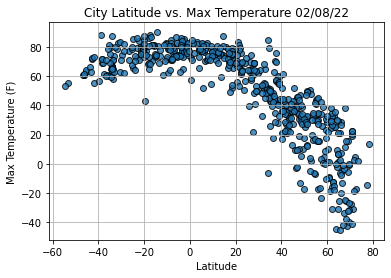

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

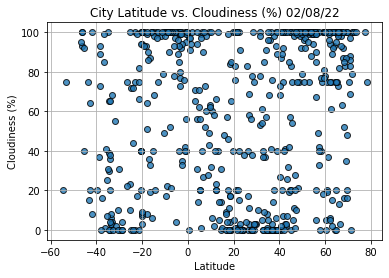

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

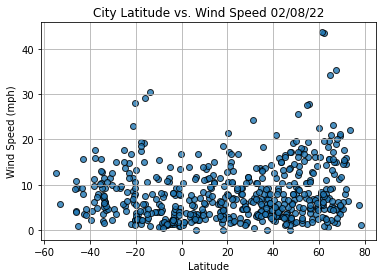

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Kahului,20.8947,-156.4700,83.46,65,20,17.27,US,2022-02-08 23:25:53
4,Jaguey Grande,22.5269,-81.1286,75.85,59,15,3.06,CU,2022-02-08 23:25:53
5,Khatanga,71.9667,102.5000,4.68,85,100,15.86,RU,2022-02-08 23:25:54
8,Sarahan,31.5167,77.8000,32.70,92,100,0.49,IN,2022-02-08 23:25:55
9,Saskylakh,71.9167,114.0833,2.62,84,100,14.50,RU,2022-02-08 23:25:56


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

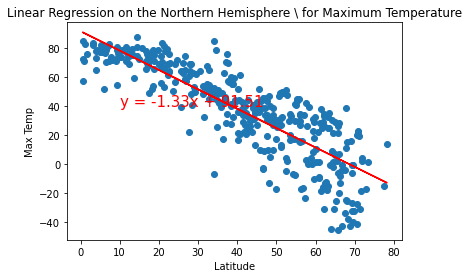

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp',(10,40))

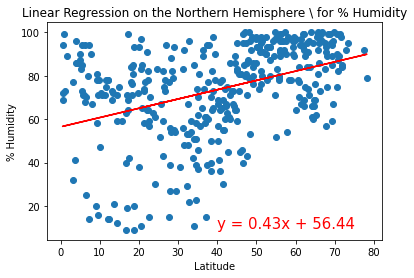

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity',(40,10))

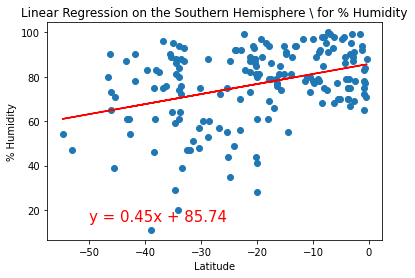

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity',(-50,15))

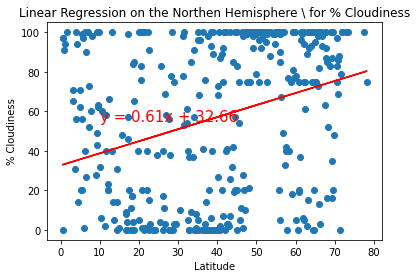

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northen Hemisphere \ for % Cloudiness', '% Cloudiness',(10,55))

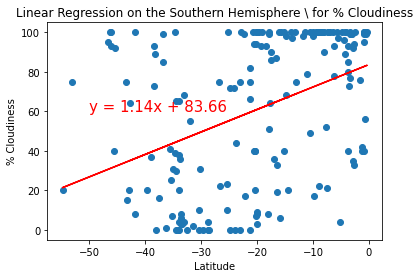

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for % Cloudiness', '% Cloudiness',(-50,60))

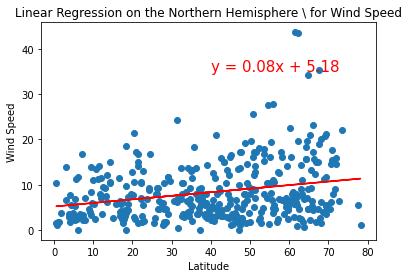

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for Wind Speed', 'Wind Speed',(40,35))